In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import sys
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import svm

In [2]:
df = pd.read_csv('exams.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
df = df[['gender', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']]

In [5]:
def replacemet_gender(information):
    if information == 'male':
        return 1        
    else:        #elif emotioin == 'female': return 0
        return 0
    
df['gender'] = df['gender'].apply(lambda x:replacemet_gender(x))

In [6]:
def replacemet_course(information):
    if information == 'completed':
        return 1        
    else:        #elif emotioin == 'none': return 0
        return 0

df['test preparation course'] = df['test preparation course'].apply(lambda x:replacemet_course(x))

In [7]:
def replacemet_lunch(information):
    if information == 'standard':
        return 1        
    else:        #elif emotioin == 'none': return 0
        return 0

df['lunch'] = df['lunch'].apply(lambda x:replacemet_lunch(x))

In [8]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,1,1,1,67,67,63
1,0,0,0,40,59,55
2,1,0,0,59,60,50
3,1,1,0,77,78,68
4,1,1,1,78,73,68


In [9]:
X_train = df.drop(['gender'], axis=1)
Y_train = df['gender']

In [10]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
pca = PCA(n_components=2)
pca.fit(X_train)
Xtrain = pca.transform(X_train)

In [11]:
Xtrain

array([[  3.63905455,  -3.28611153],
       [ 28.17704743,  12.6819636 ],
       [ 19.93383286,  -4.87079141],
       ...,
       [ 54.73192887,   4.71128582],
       [-15.11866244,   2.5833677 ],
       [  9.3455003 ,  -4.52477733]])

In [12]:
df_pca = pd.DataFrame(data = Xtrain,columns = ['param1', 'param2'])
display(pd.concat([df_pca, Y_train], axis = 1))

,param1,param2,gender
0,3.639055,-3.286112,1
1,28.177047,12.681964,0
2,19.933833,-4.870791,1
3,-11.235437,-5.503051,1
4,-8.957711,-8.065517,1
...,...,...,...
995,-2.635339,-6.322624,1
996,-37.535494,3.056842,1
997,54.731929,4.711286,0
998,-15.118662,2.583368,0


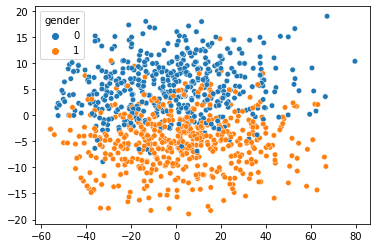

In [13]:
sns.scatterplot(x=Xtrain[:,0], y=Xtrain[:,1], hue=Y_train, data=Xtrain,s=30)

In [14]:
tsne =TSNE(n_components = 2)

X_tsne = tsne.fit_transform(X_train)
df_tsne = pd.DataFrame(data = X_tsne, columns =['param1', 'param2'])
display(pd.concat([df_tsne, df[['gender']]], axis = 1))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


,param1,param2,gender
0,5.842741,-10.913118,1
1,33.785397,18.508554,0
2,37.711399,4.255063,1
3,-14.054327,-11.671265,1
4,-12.081346,-16.606159,1
...,...,...,...
995,-2.178359,-16.140663,1
996,-54.194641,2.946846,1
997,63.972031,15.600420,0
998,-23.266590,-1.444993,0


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


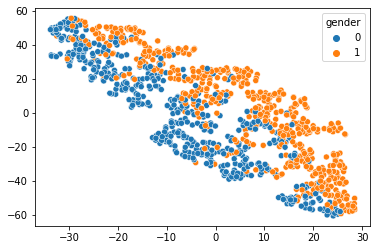

In [15]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_train)

sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=Y_train)